In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Columns Description:
-  id - ID
-  battery_power - Total energy a battery can store in one time measured in mAh
-  blue - Has Bluetooth or not
-  clock_speed - The speed at which the microprocessor executes instructions
-  dual_sim - Has dual sim support or not
-  fc - Front Camera megapixels
-  four_g - Has 4G or not
-  int_memory - Internal Memory in Gigabytes
-  m_dep - Mobile Depth in cm
-  mobile_wt - Weight of mobile phone
-  n_cores - Number of cores of the processor
-  pc - Primary Camera megapixels
-  px_height - Pixel Resolution Height
-  px_width - Pixel Resolution Width
-  ram - Random Access Memory in Megabytes
-  sc_h - Screen Height of mobile in cm
-  sc_w - Screen Width of mobile in cm
-  talk_time - longest time that a single battery charge will last when you are
-  three_g - Has 3G or not
-  touch_screen - Has touch screen or not
-  wifi - Has wifi or not
-  price_range - This is the target variable with the value of:
  ● 0 (low cost)
  ● 1 (medium cost)
  ● 2 (high cost)
  ● 3 (very high cost)

In [7]:
df.shape

(2000, 21)

# Data Cleaning
- incorrect Data type
- missing values
- duplicates
- outliers

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

four_g and n_cores are having incorrect datatypes

In [32]:
df['four_g'] =  df['four_g'].apply(int)
df['n_cores'] = df['n_cores'].apply(lambda x : round(x))

In [33]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,resolution,mobile_size
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,...,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1992.000000
mean,1238.319779,0.495984,1.522139,0.510542,4.308233,0.521084,32.066767,0.502021,140.290161,4.516566,...,2123.505020,12.308233,5.772088,11.004016,0.761044,0.502008,0.505522,1.498996,9.037306e+05,13.975771
std,439.536090,0.500109,0.815413,0.500014,4.338673,0.499681,18.136767,0.288550,35.410361,2.290707,...,1084.793772,4.212031,4.357604,5.464647,0.426553,0.500122,0.500095,1.118314,8.272286e+05,5.119772
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.000000
25%,851.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000,2.624120e+05,9.486833
50%,1226.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000,5.997310e+05,14.212670
75%,1615.250000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000,1.359027e+06,17.888544
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000,3.886306e+06,26.172505


### No Duplicates

In [10]:
df.duplicated().sum()

0

## Missing Values:

In [11]:
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,5
four_g,5
int_memory,5
m_dep,5
mobile_wt,4
n_cores,4


In [12]:
df.loc[df['fc'].isnull()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
157,1224,0,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,...,747.0,826.0,506.0,10.0,0.0,11,1,1,1,0
158,1356,0,2.8,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1612.0,1983.0,3702.0,17.0,0.0,19,0,0,0,3
261,728,0,2.7,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,1.0,12,1,1,1,1
276,1662,0,0.5,0,NaN,NaN,NaN,0.8,126.0,4.0,...,32.0,1509.0,3760.0,9.0,5.0,13,1,1,1,3
371,1011,0,1.1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,481.0,749.0,2261.0,7.0,6.0,16,1,1,1,1


there are only 5 rows contain nans for 'fc' and many other columns so we can drop them

In [13]:
df.dropna(subset = ['fc'], inplace = True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [14]:
df.reset_index()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1991,1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1992,1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1993,1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [15]:
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,1
mobile_wt,0
n_cores,0


In [16]:
df.loc[df['px_height'].isnull()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
292,1995,1,1.9,0,6.0,0.0,9.0,0.8,139.0,6.0,...,NaN,1963.0,1203.0,14.0,12.0,18,1,1,1,2
293,1517,0,0.5,0,6.0,1.0,48.0,0.6,143.0,5.0,...,NaN,1489.0,2822.0,15.0,5.0,11,1,1,1,3
341,811,1,2.4,1,5.0,1.0,2.0,0.3,106.0,6.0,...,NaN,NaN,NaN,NaN,NaN,2,1,0,1,1


we can impute the px_hieght column for the 3 rows containing it as nan by assuming that all the phones in a particular price category are having similar dimensions, so we will impute the missing px_height of a phone based on the average value of px_heights of all phones in the same price category

In [17]:
for i in range(1,4):
  mean1 = df['px_height'][df['price_range'] == i].mean()
  df.loc[(df['price_range'] == i) & (df['px_height'].isnull()) ,'px_height'] = mean1



In [18]:
df.isna().sum()


,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,1
mobile_wt,0
n_cores,0


In [19]:
df.loc[df['m_dep'].isnull()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
217,1336,0,0.9,0,5.0,1.0,17.0,NaN,194.0,5.0,...,55.0,583.0,1869.0,13.0,1.0,16,1,1,1,1


to impute m_dep, we can do what we did the px_height case and impute it with the average m_dep of all phones in the same price category

In [20]:

m_dep_null = df.loc[(df['m_dep'].isnull())]

m_dep_price = int(m_dep_null['price_range'])

mean2 = df['m_dep'][df['price_range'] == m_dep_price].mean()
df.loc[(df['m_dep'].isnull()), 'm_dep'] = mean2

<ipython-input-20-48d8a6ab2a1b>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  m_dep_price = int(m_dep_null['price_range'])


In [21]:
df.dropna(subset = ['pc','ram'], inplace = True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [22]:
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


All missing values handled

# Feature Engineering

In [24]:
df['resolution'] = df['px_height'] * df['px_width']
df['mobile_size'] = np.sqrt((df['sc_h'] **2) + (df['sc_w'] **2))

#  EDA

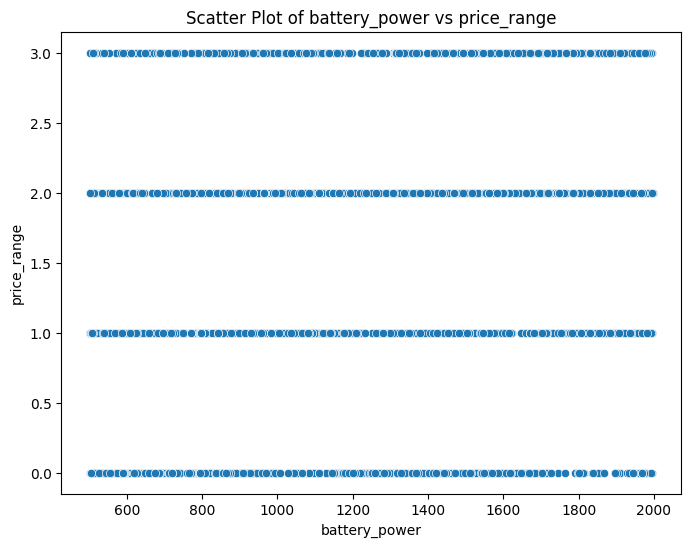

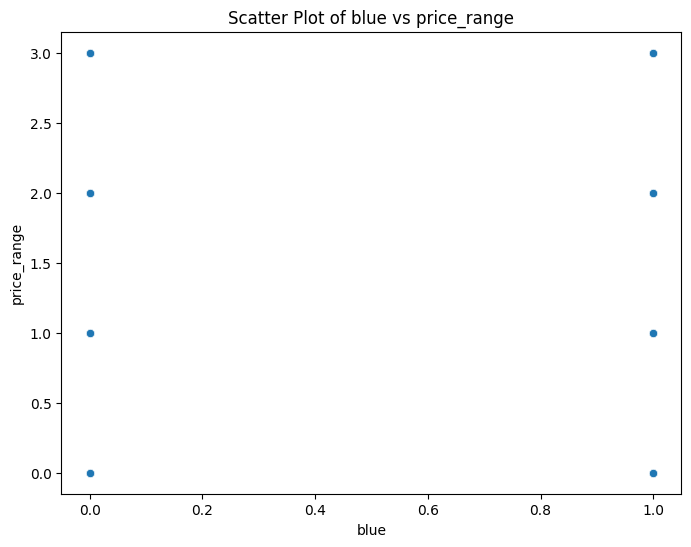

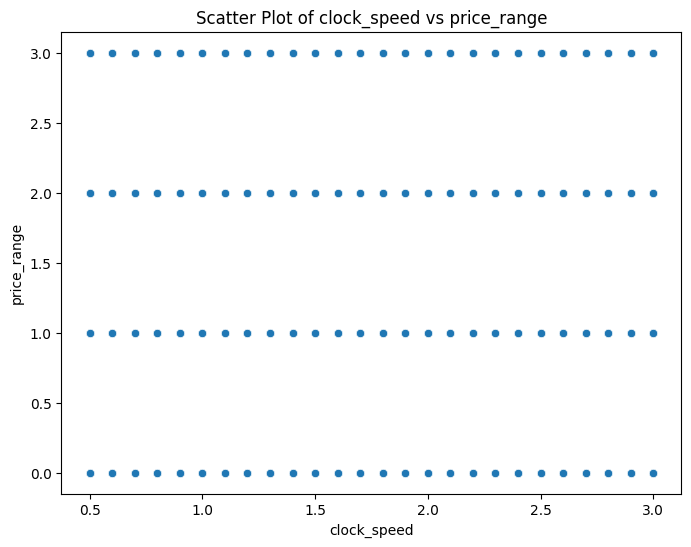

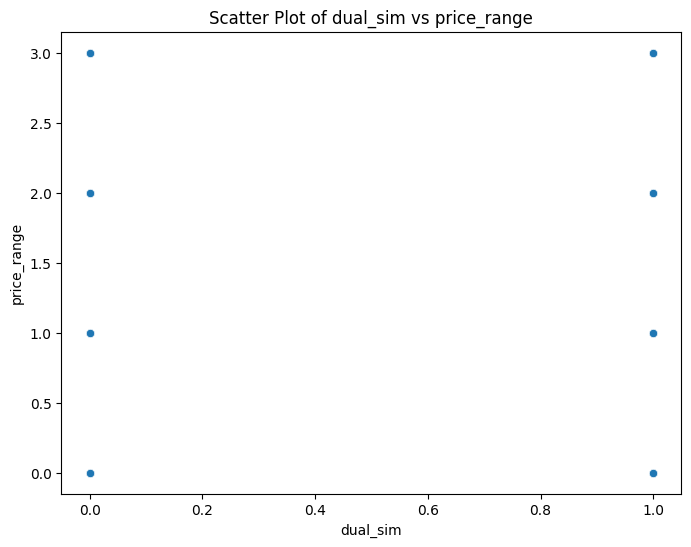

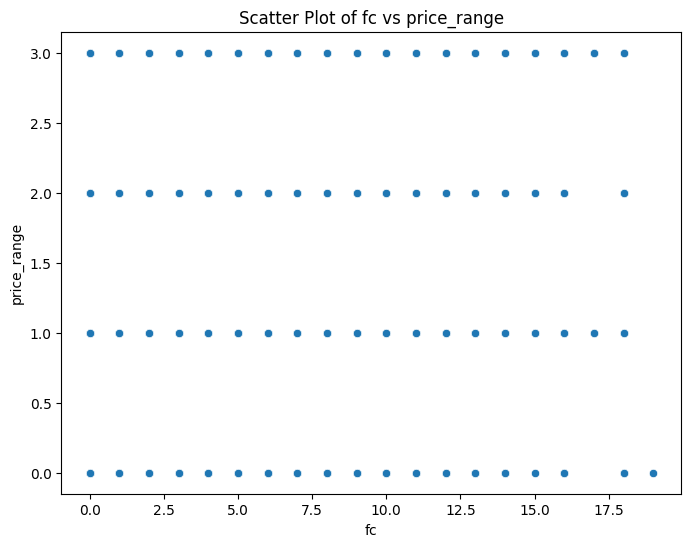

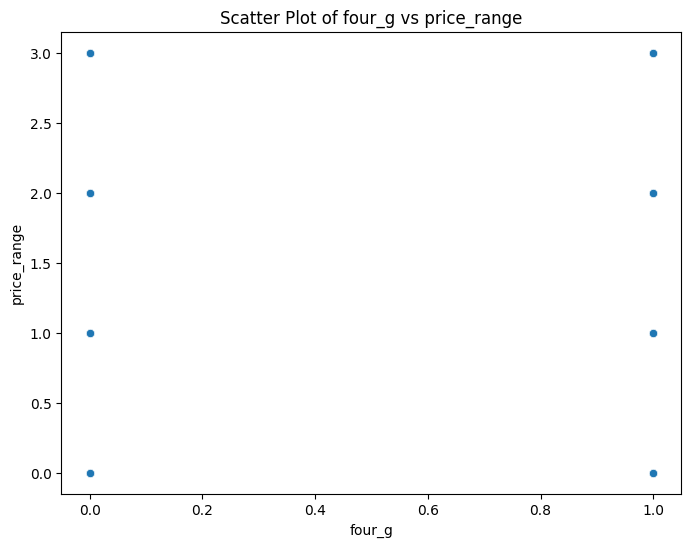

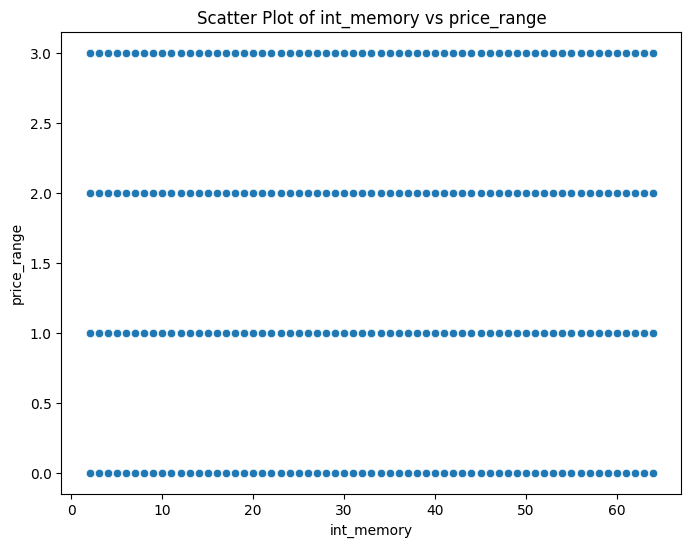

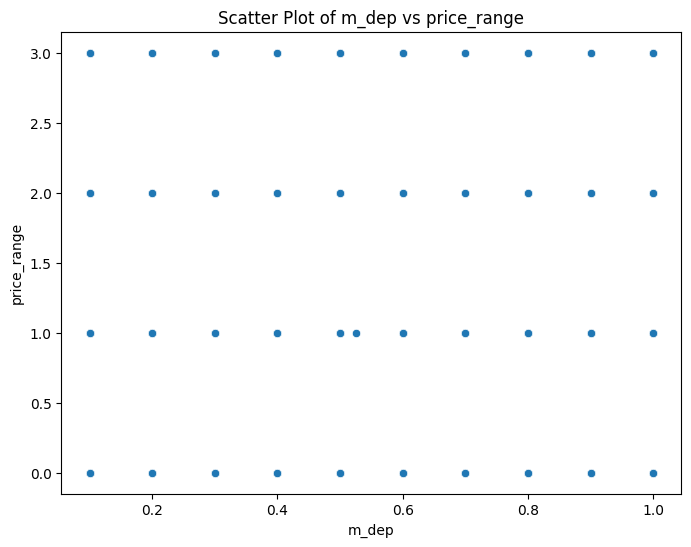

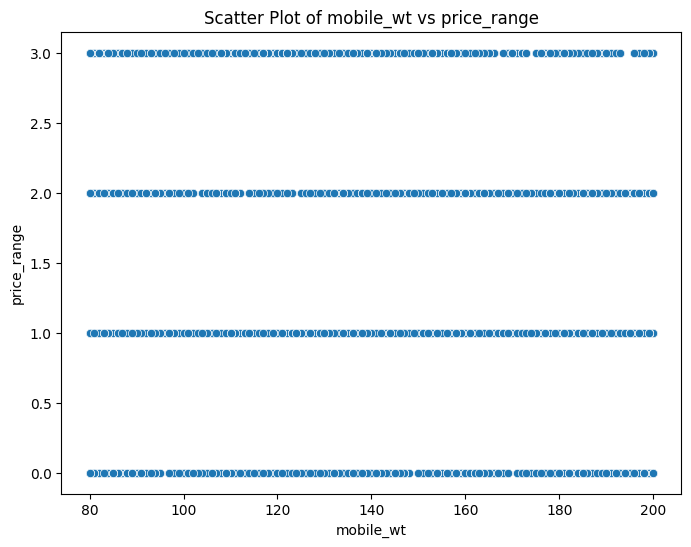

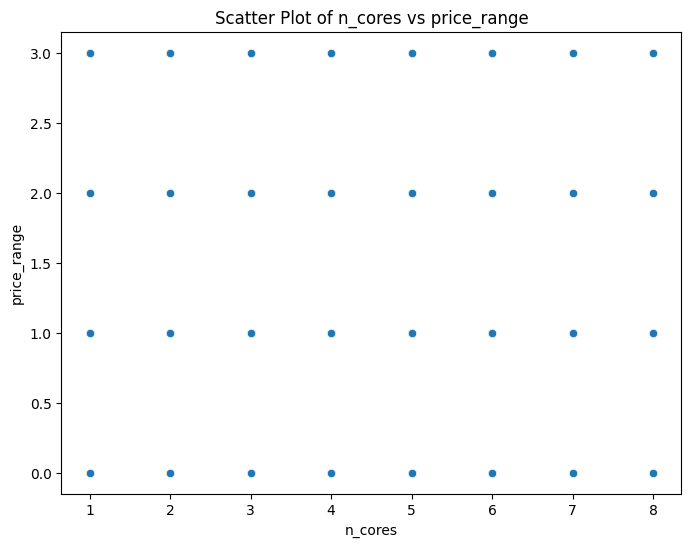

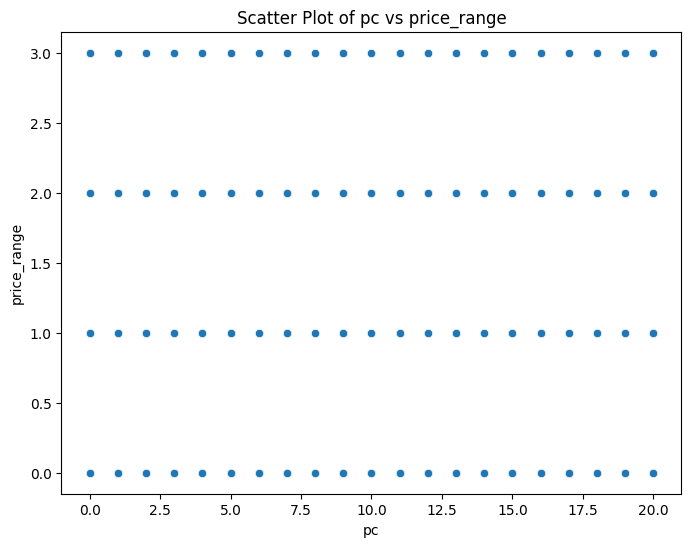

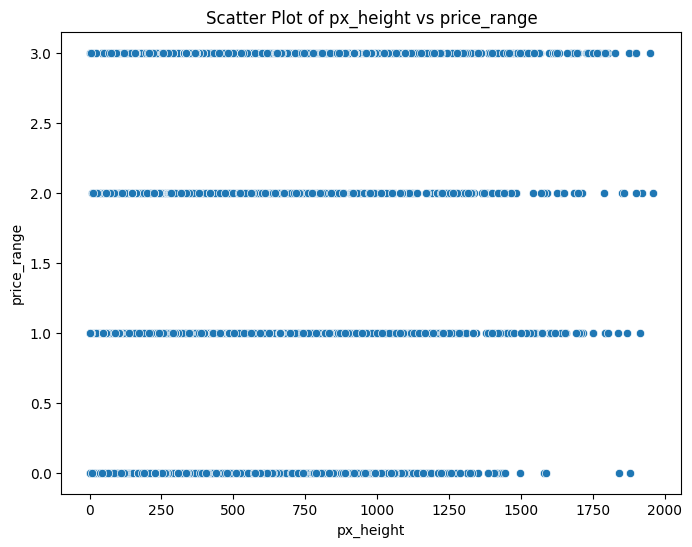

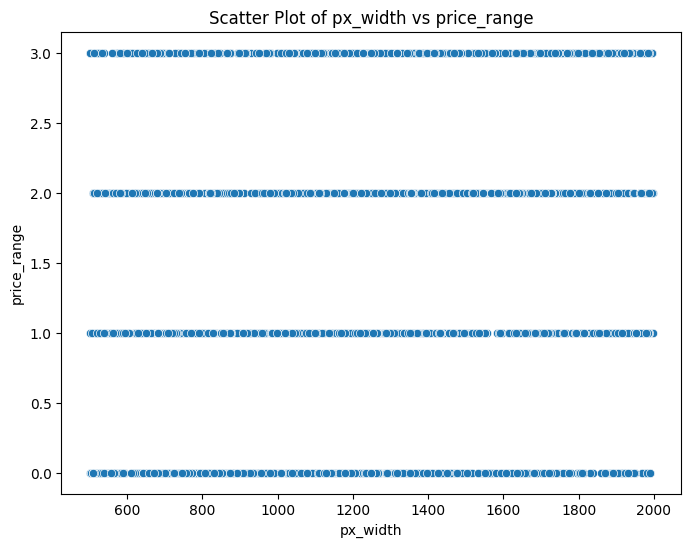

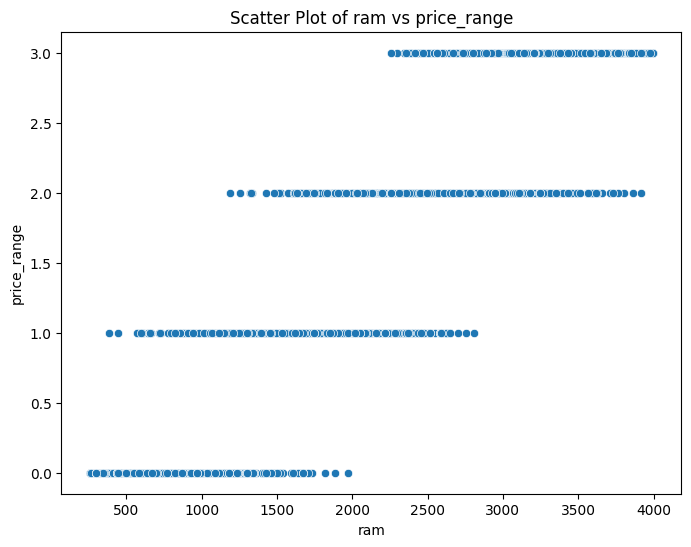

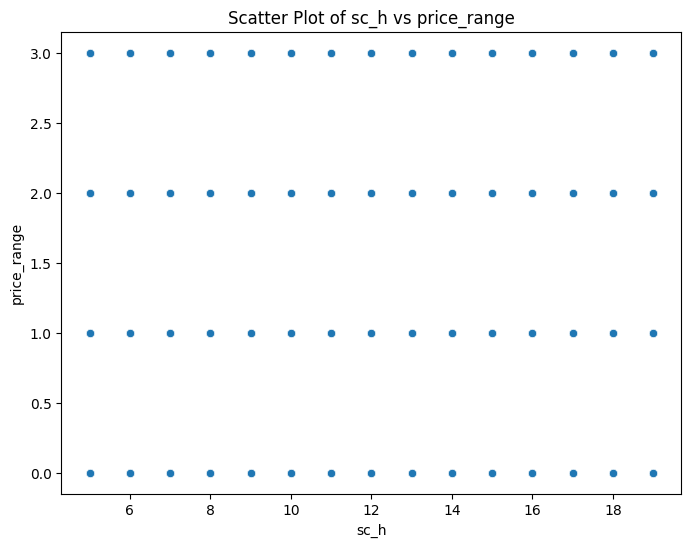

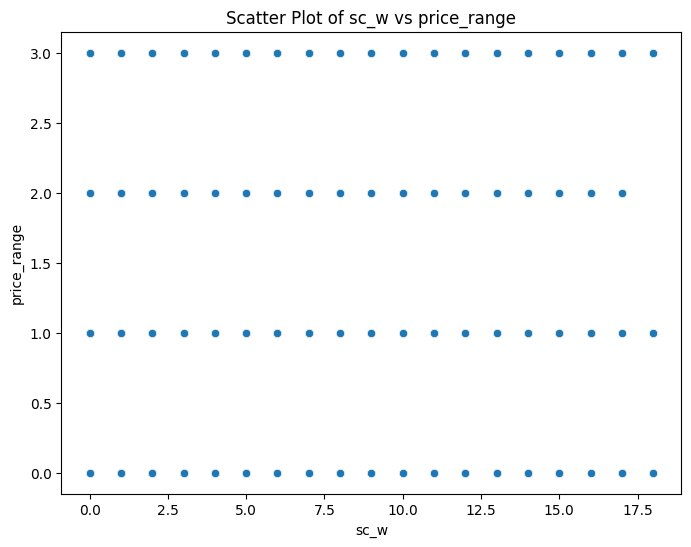

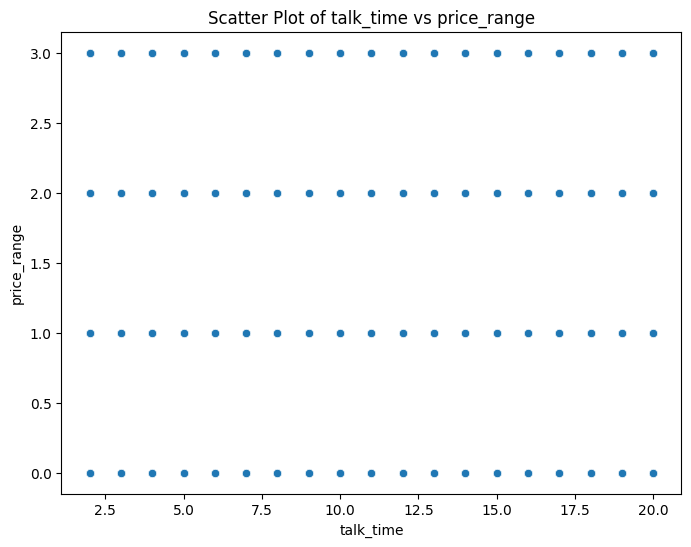

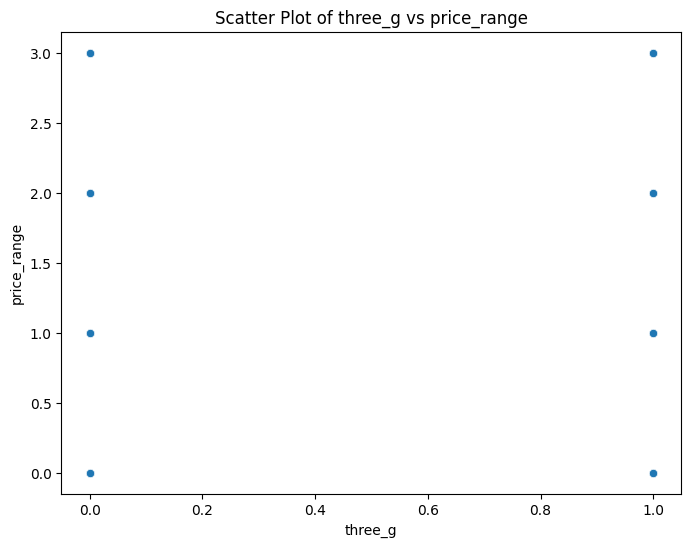

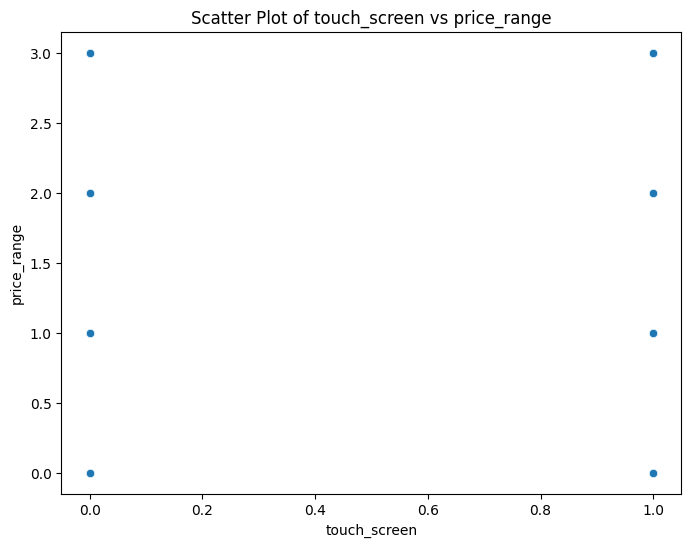

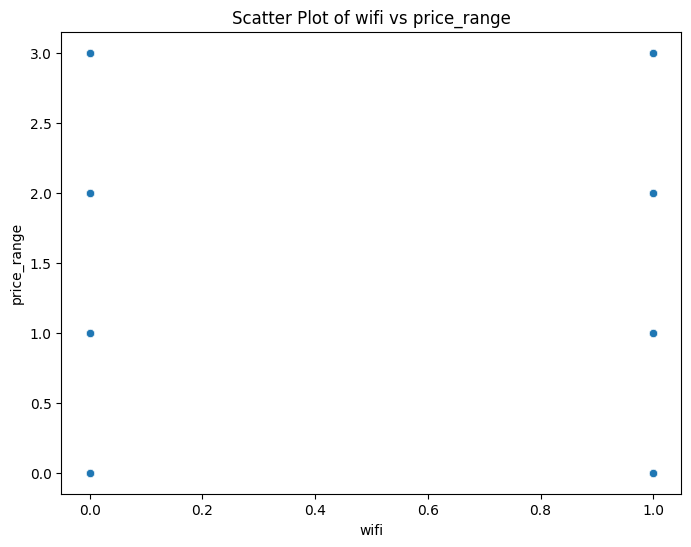

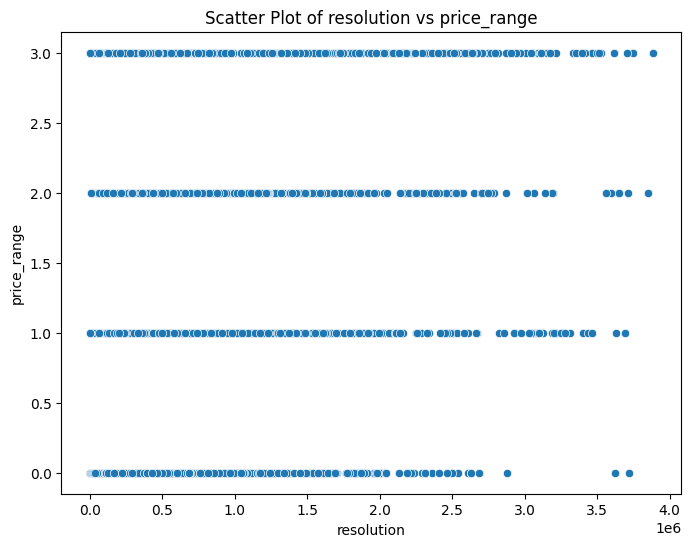

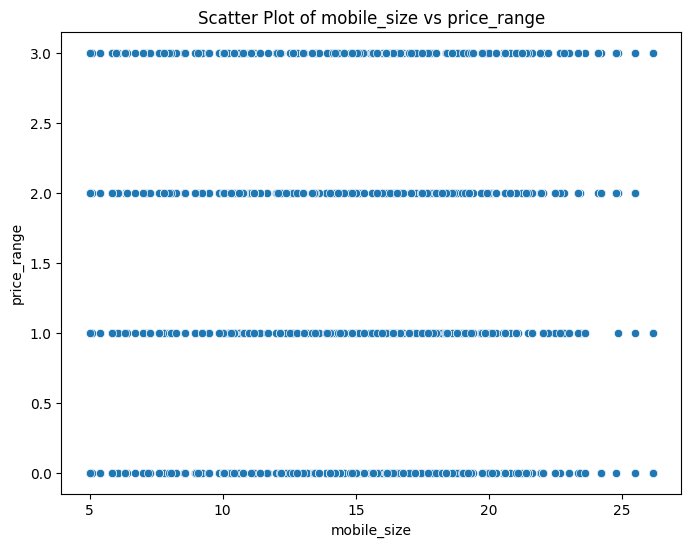

In [25]:
features = df.columns.drop('price_range')  # Exclude the target column

# Loop through each feature and plot it against the target column
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['price_range'])
    plt.title(f'Scatter Plot of {feature} vs {df["price_range"].name}')
    plt.xlabel(feature)
    plt.ylabel(df['price_range'].name)
    plt.show()


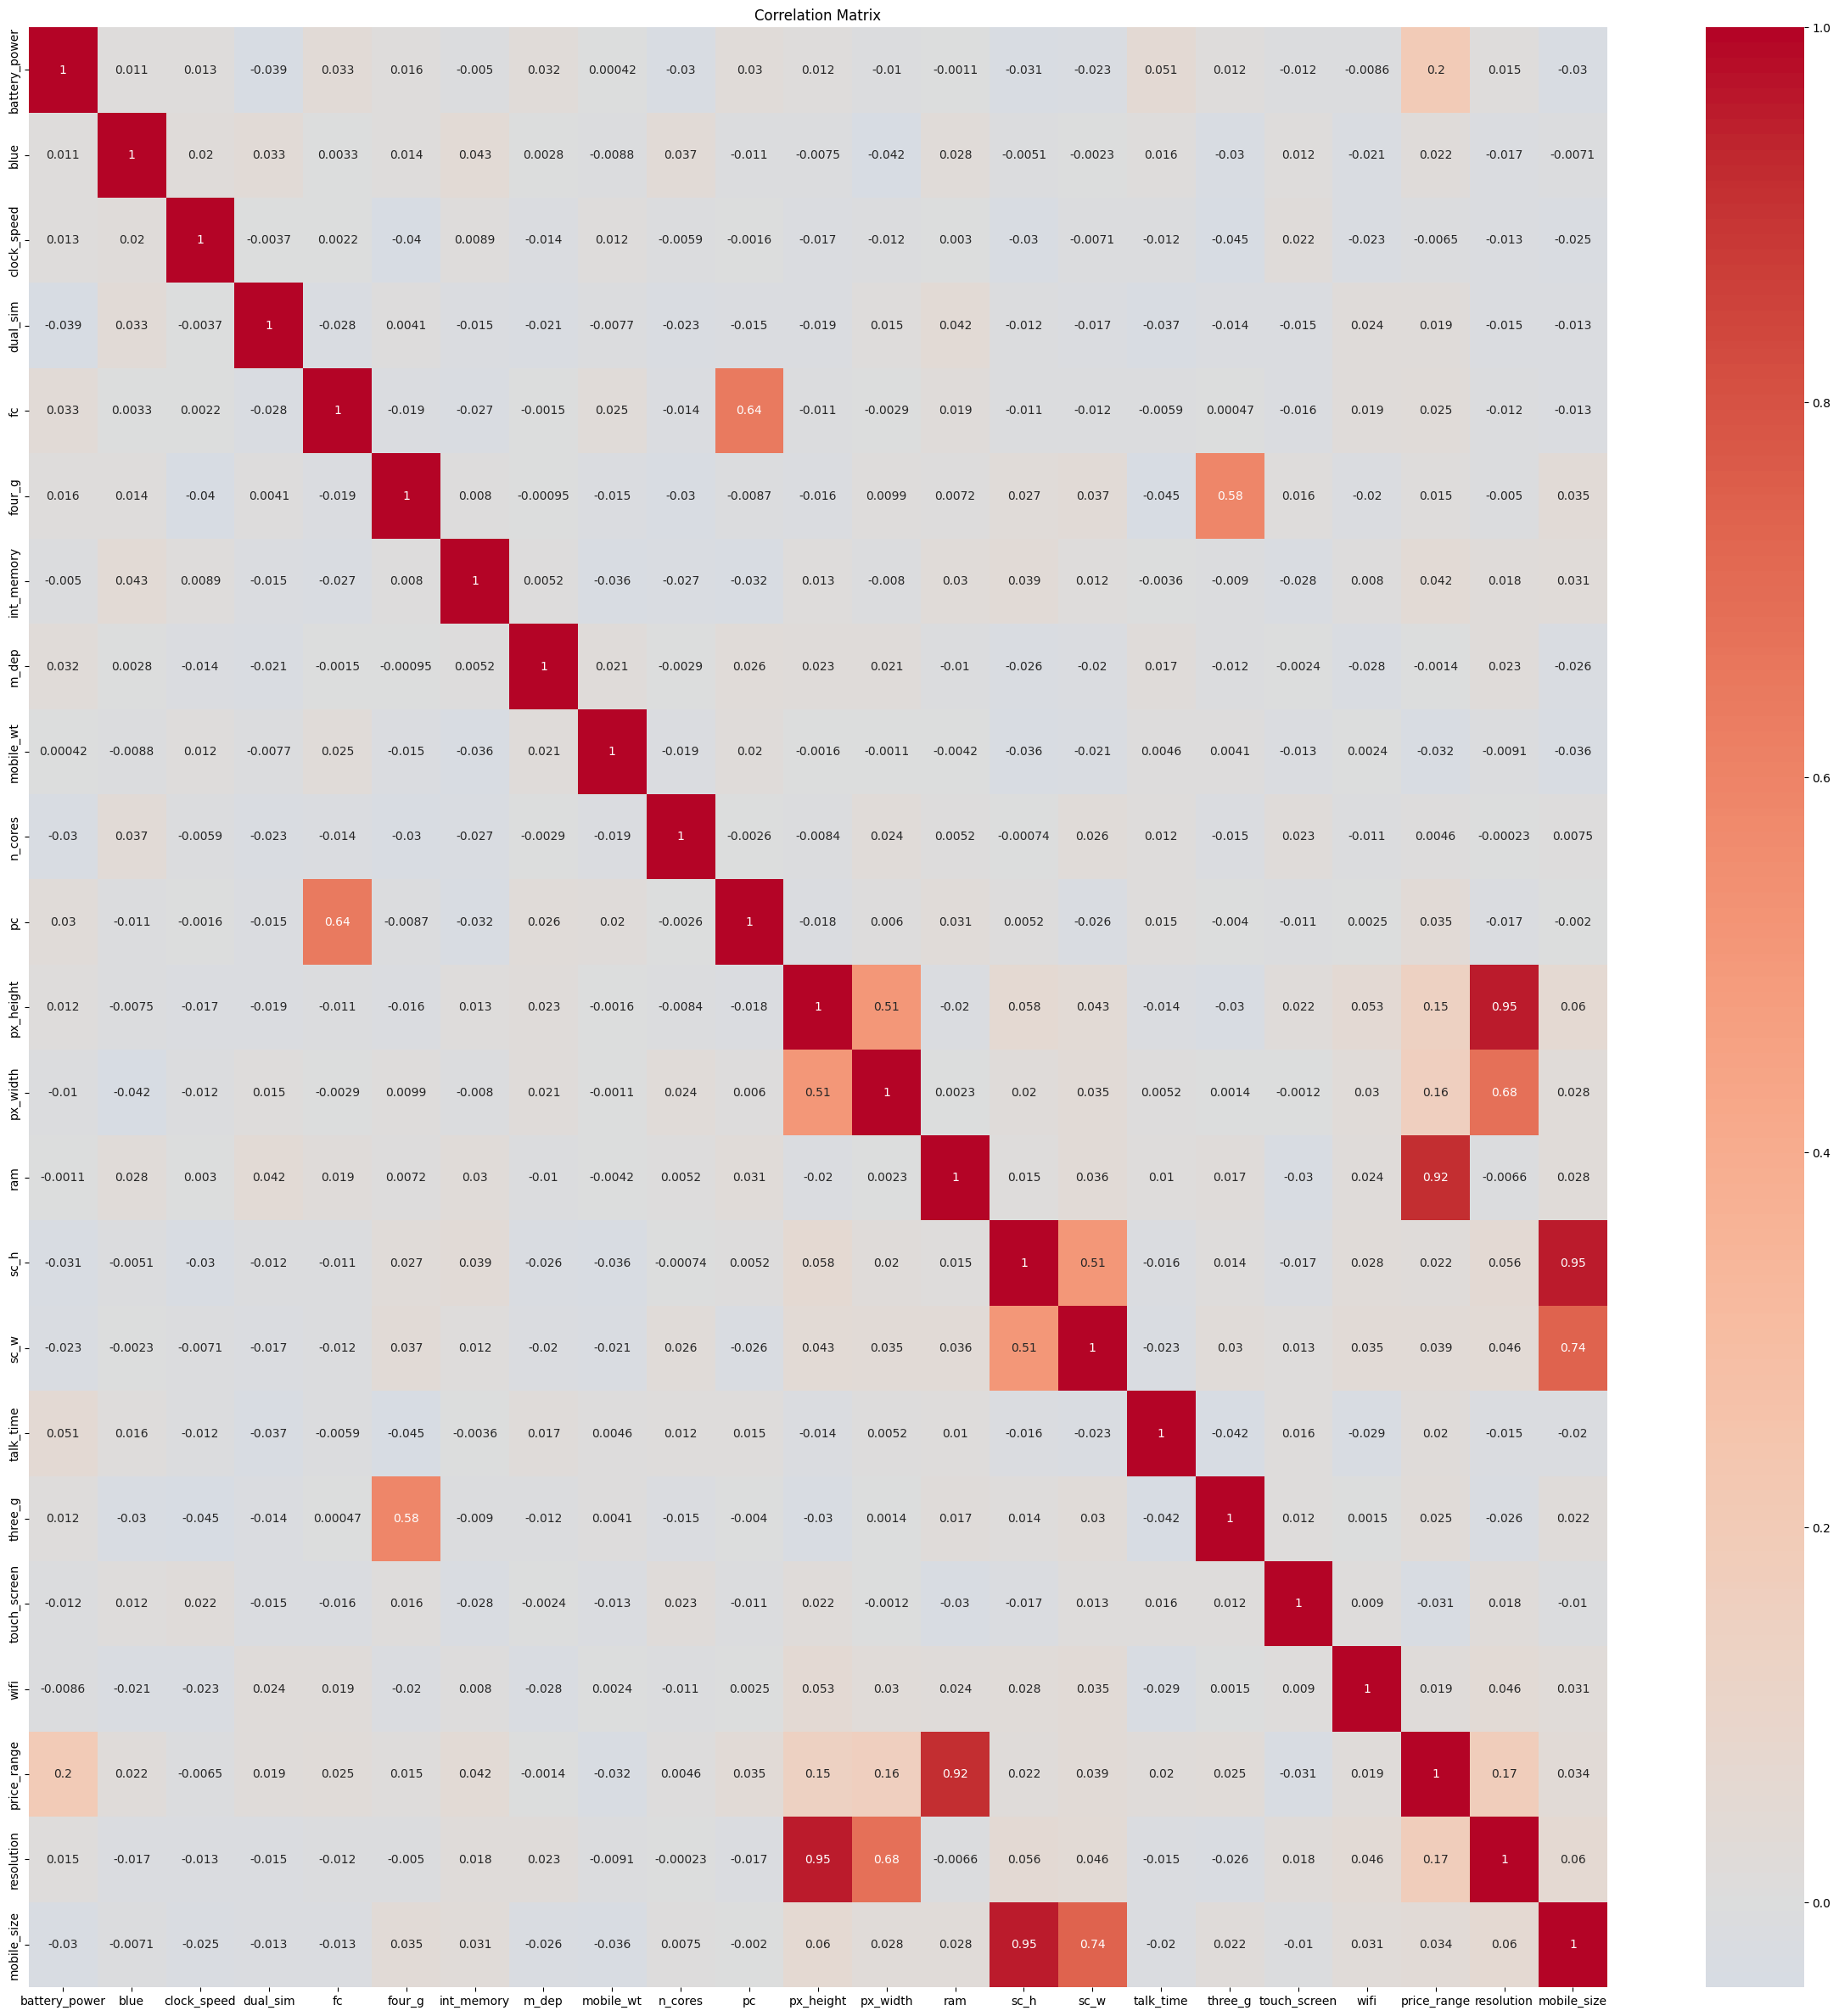

In [26]:
correlation_matrix = df.corr()

# Extract correlation with the target column
correlation_with_target = correlation_matrix['price_range'].sort_values(ascending=False)
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [27]:
# ram is the most important feature in pricing -> correlation value of 0.92
# battery power is the 2nd most important feature -> correlation value of 0.2
# px_height,widthand resolution all have near correlation value -> [0.15-0.17]
# clock_speed, m_dep and n_core having very small correlation values therfore minor impact on pricing

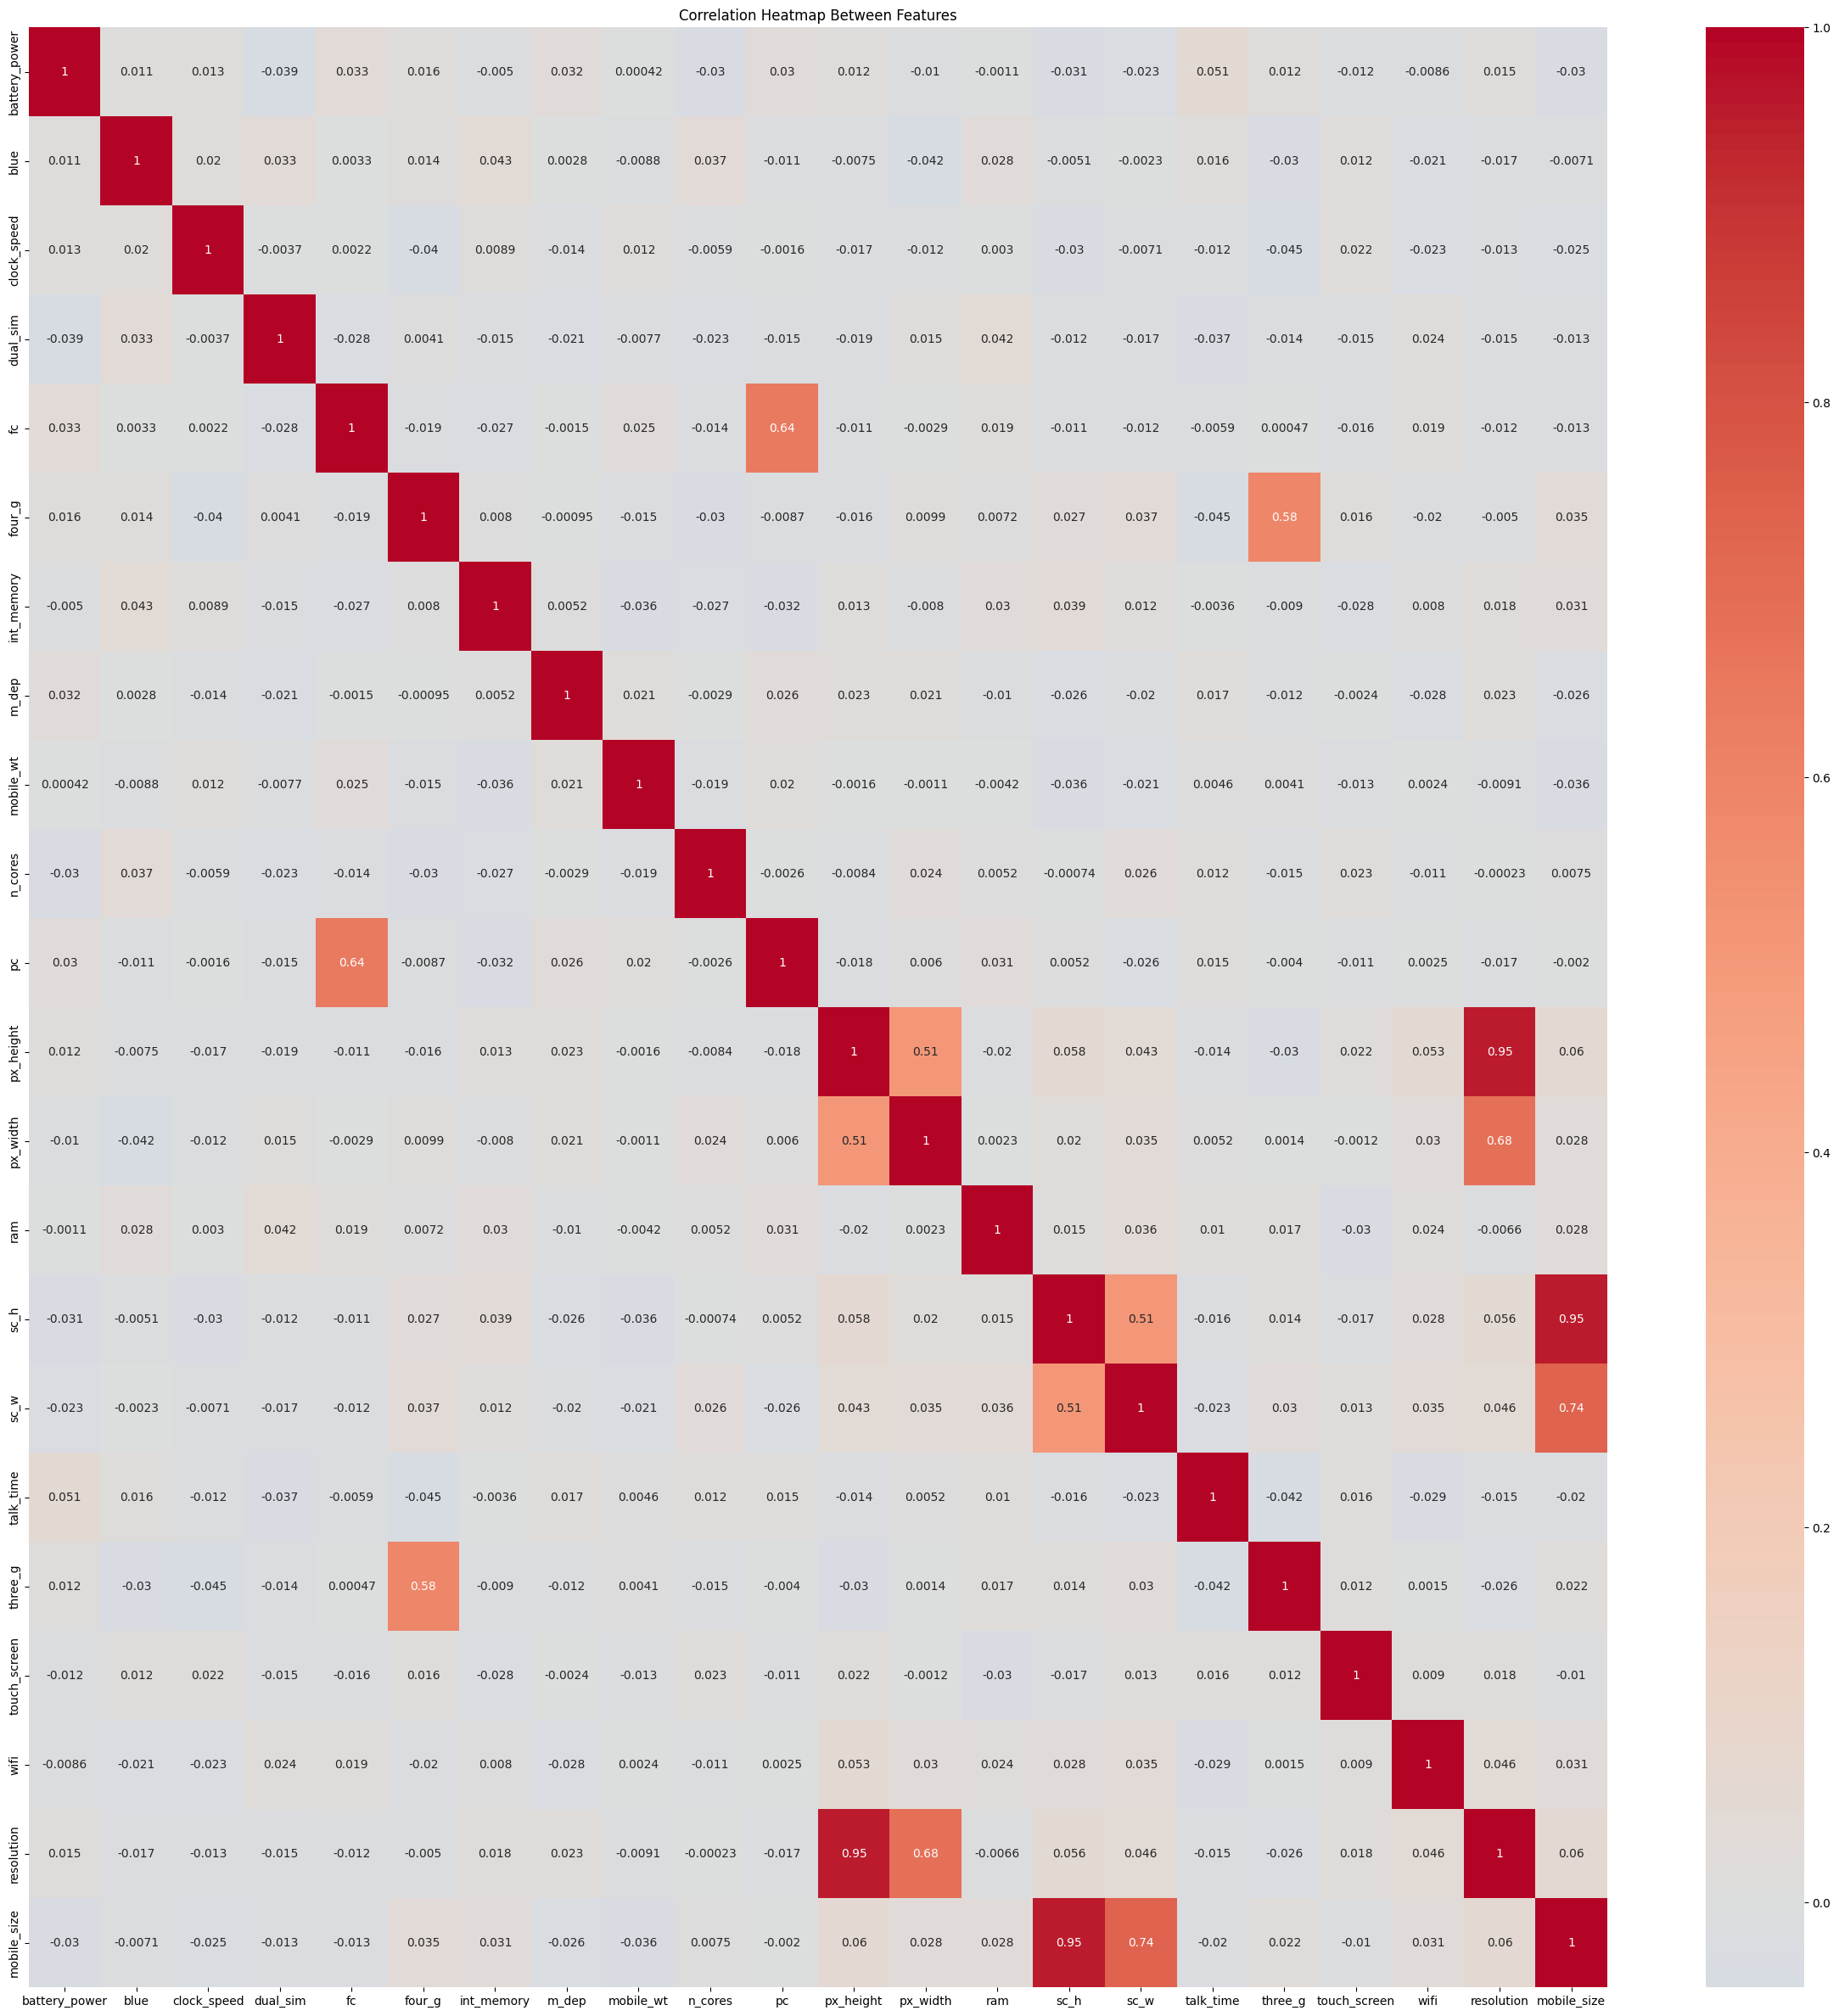

In [28]:
# Assuming 'df' is your DataFrame and 'target_column' is your target column name
features_df = df.drop(columns=['price_range'])  # Drop the target column

# Calculate the correlation matrix for the remaining features
correlation_matrix = features_df.corr()

# Set the size of the heatmap
plt.figure(figsize=(30, 30))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Set the title
plt.title('Correlation Heatmap Between Features')

# Show the plot
plt.show()


In [29]:
# resolution and px_height are highly correlated so we can use only of them -> resolution
# sc_h and mobile_size are highly correlated so we can use only of them -> mobile_size
# four_g and three g  are highly correlated so we can use only of them -> four_g -> if mobile has four_g it must have 3_g

<Axes: xlabel='n_cores'>

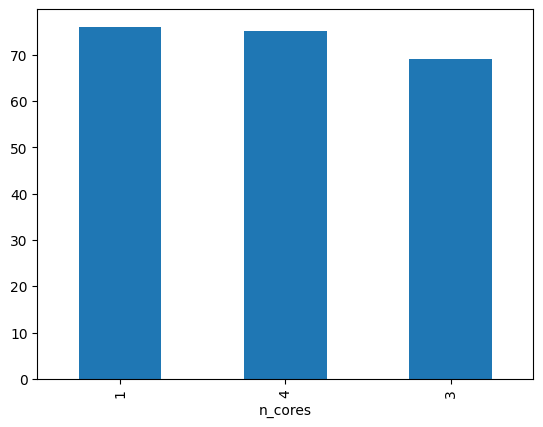

In [30]:
# what are the top 3 n_cores in mobiles of price 1 category
df['n_cores'][df['price_range'] == 1].value_counts().nlargest(3).plot(kind = 'bar')

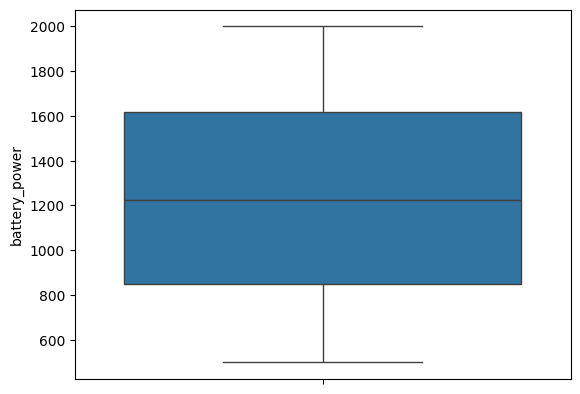

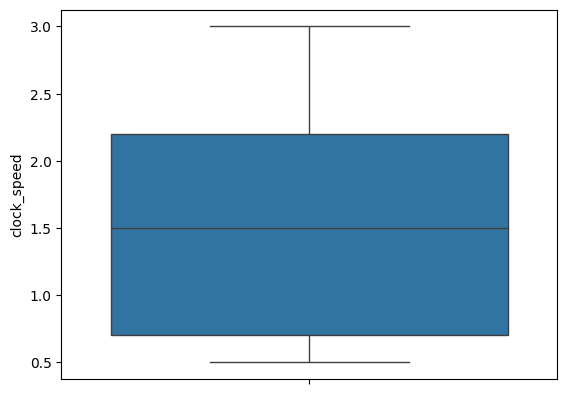

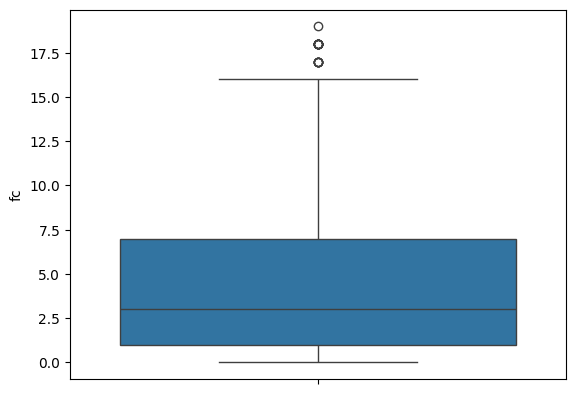

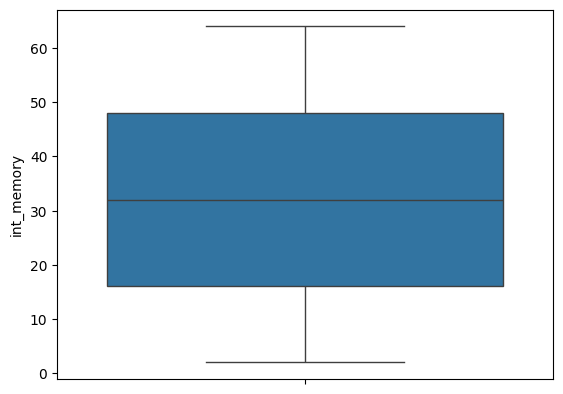

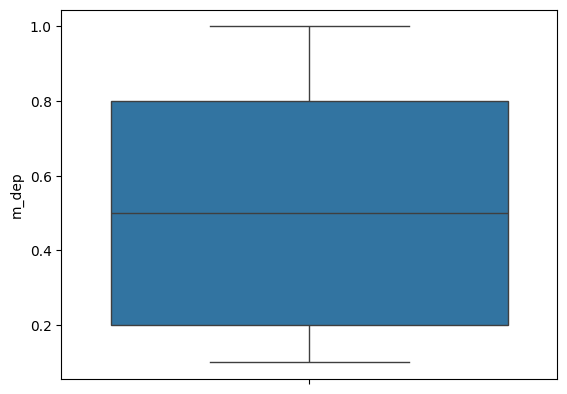

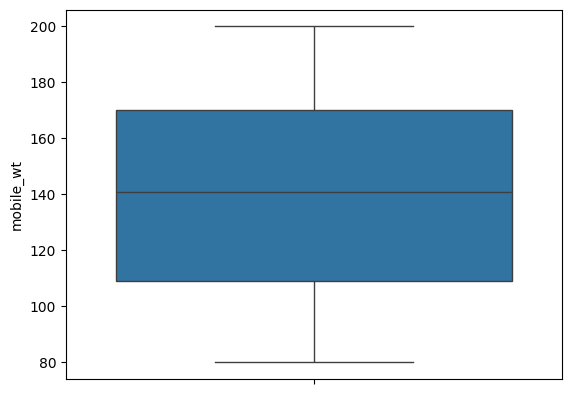

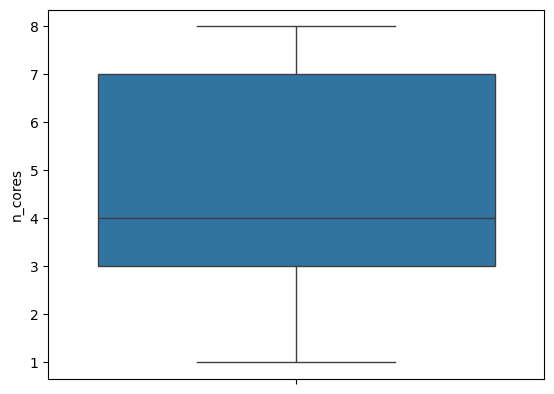

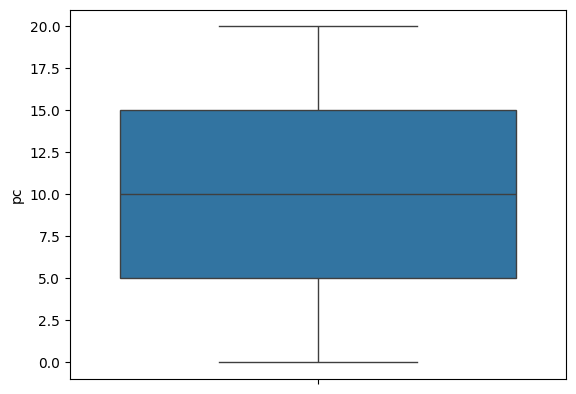

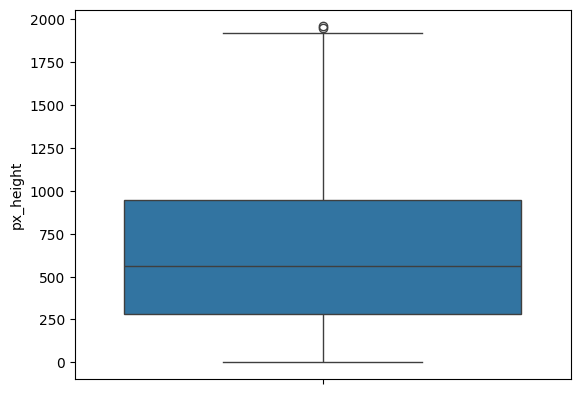

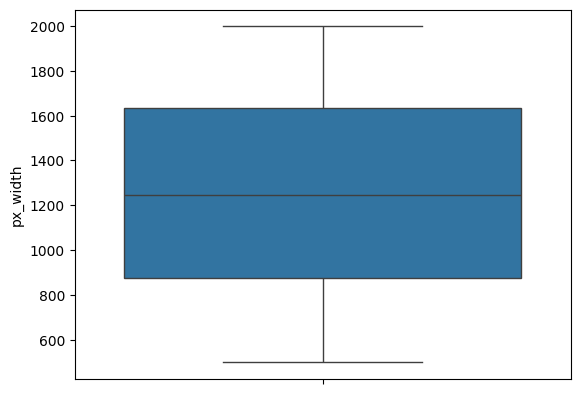

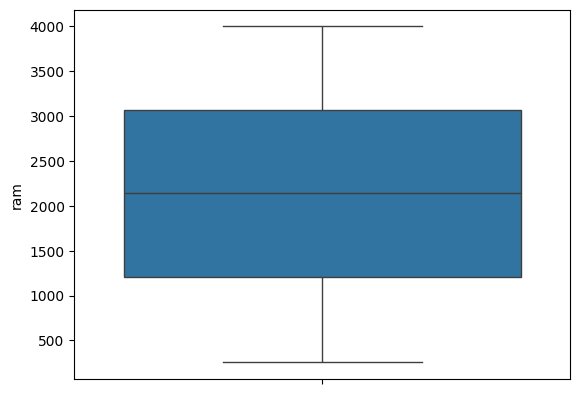

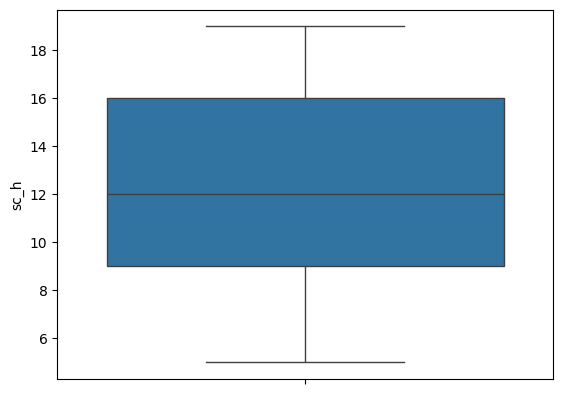

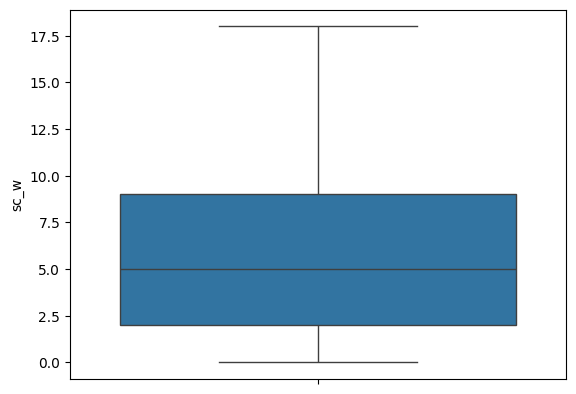

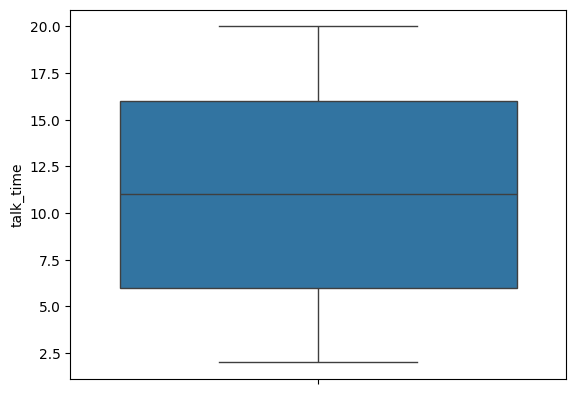

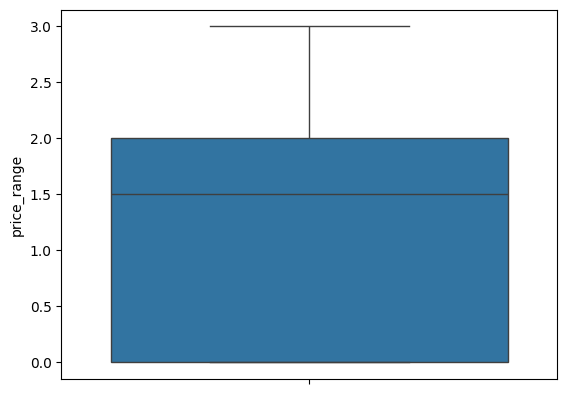

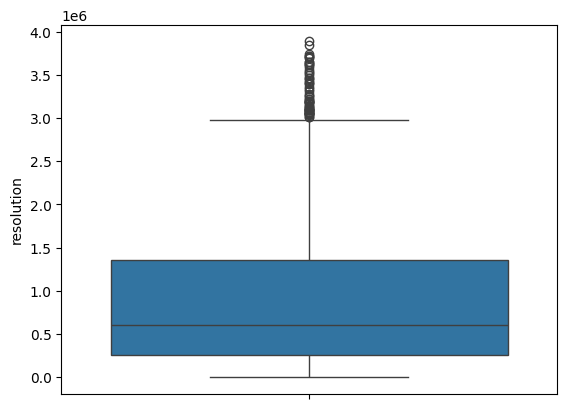

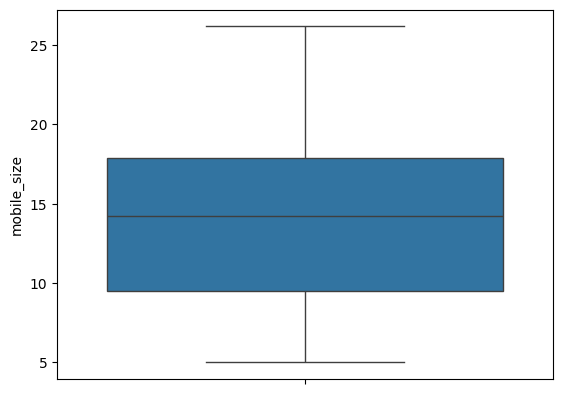

In [34]:
columns_to_bo_norm = ['blue','four_g','dual_sim','three_g','touch_screen','wifi']
for column in df.drop(columns = columns_to_bo_norm).columns:
  sns.boxplot(data = df[column])
  plt.show()

# Mutual information of the predictor and target
- we can see that ram and battery are the most valuable predictors as they are having the highest mutual information to the price range where knowing their values reveals so much about which price category the phone should belong to

In [38]:
from sklearn.feature_selection import mutual_info_classif
X = df.copy()
y = X.pop('price_range')
discrete_features = X.dtypes == int
mi_scores = mutual_info_classif(X,y,discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores,name = 'MI scores', index = X.columns)
mi_scores.sort_values()

,MI scores
int_memory,0.000000
sc_w,0.000000
sc_h,0.000000
wifi,0.000224
clock_speed,0.000327
three_g,0.000366
dual_sim,0.000370
blue,0.000430
four_g,0.000750
touch_screen,0.000977


# Models Implementation
- Random Forest

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [63]:
features = df.columns.drop('price_range')
x = df[features]
y = df['price_range']



In [64]:
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)


In [71]:
rfclassifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20)

model = rfclassifier.fit(X_train,y_train)

y_pred = rfclassifier.predict(X_test)

print('accuracy', accuracy_score(y_test,y_pred))
print('classification report', classification_report(y_test,y_pred))


accuracy 0.8946488294314381
classification report               precision    recall  f1-score   support

           0       0.91      0.99      0.95       155
           1       0.89      0.81      0.85       150
           2       0.86      0.82      0.84       151
           3       0.91      0.95      0.93       142

    accuracy                           0.89       598
   macro avg       0.89      0.89      0.89       598
weighted avg       0.89      0.89      0.89       598



In [66]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=kf)
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.88972431 0.85213033 0.86432161 0.86432161 0.89447236]


In [67]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are defined

# Create an XGBoost model for multiclass classification
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # For multiclass classification
    num_class=4,  # Number of classes
    random_state=42,
    max_depth = 6
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_preds = xgb_model.predict(X_test)

# Evaluate performance
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.9096989966555183


In [68]:
import lightgbm as lgb

# Create a LightGBM model for multiclass classification
lgb_model = lgb.LGBMClassifier(
    objective='multiclass',  # For multiclass classification
    num_class=4,  # Number of classes
    random_state=42
)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
lgb_preds = lgb_model.predict(X_test)

# Evaluate performance
lgb_accuracy = accuracy_score(y_test, lgb_preds)
print("LightGBM Accuracy:", lgb_accuracy)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1764
[LightGBM] [Info] Number of data points in the train set: 1394, number of used features: 22
[LightGBM] [Info] Start training from score -1.399291
[LightGBM] [Info] Start training from score -1.390608
[LightGBM] [Info] Start training from score -1.387730
[LightGBM] [Info] Start training from score -1.367815
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy: 0.8963210702341137


In [69]:
rf_preds = rfclassifier.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
lgb_preds = lgb_model.predict(X_test)

# Majority voting
predictions = []
for i in range(len(X_test)):
    votes = [rf_preds[i], xgb_preds[i], lgb_preds[i]]
    prediction = max(set(votes), key=votes.count)
    predictions.append(prediction)

# Evaluate performance
accuracy = accuracy_score(y_test, predictions)
print("Majority Voting Accuracy:", accuracy)

Majority Voting Accuracy: 0.9063545150501672


# Results without Feature selection
- Random Forest:0.8946
- Xgb boost: 0.9096
- Light GBM: 0.9096

In [74]:
importances = rfclassifier.feature_importances_
importances_series = pd.Series(importances, name= 'Feature Importance', index = features)
importances_series.sort_values(ascending = False)

,Feature Importance
ram,0.452024
battery_power,0.068471
resolution,0.049024
px_width,0.048057
px_height,0.045671
mobile_wt,0.035247
mobile_size,0.034194
int_memory,0.033060
talk_time,0.028290
pc,0.026713


# Models implementation with feature selection

In [86]:
# Features to select
columns_to_select = df.columns.drop(['three_g','sc_h','px_height','clock_speed', 'm_dep', 'n_cores'])


In [77]:
features = columns_to_select
x = df[features]
y = df['price_range']


In [78]:
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)



In [79]:
rfclassifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20)

model2 = rfclassifier.fit(X_train,y_train)

y_pred2 = rfclassifier.predict(X_test)

print('accuracy', accuracy_score(y_test,y_pred2))
print('classification report', classification_report(y_test,y_pred2))


accuracy 1.0
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00       142

    accuracy                           1.00       598
   macro avg       1.00      1.00      1.00       598
weighted avg       1.00      1.00      1.00       598



In [80]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=kf)
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [1. 1. 1. 1. 1.]


In [81]:
xgb_model2 = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    random_state=42,
    max_depth = 6
)

# Train the model
xgb_model2.fit(X_train, y_train)

# Make predictions
xgb_preds2 = xgb_model2.predict(X_test)

# Evaluate performance
xgb_accuracy2 = accuracy_score(y_test, xgb_preds2)
print("XGBoost Accuracy:", xgb_accuracy2)

XGBoost Accuracy: 1.0


In [82]:
lgb_model2 = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=4,
    random_state=42
)

# Train the model
lgb_model2.fit(X_train, y_train)

# Make predictions
lgb_preds2 = lgb_model2.predict(X_test)

# Evaluate performance
lgb_accuracy2 = accuracy_score(y_test, lgb_preds2)
print("LightGBM Accuracy:", lgb_accuracy2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1448
[LightGBM] [Info] Number of data points in the train set: 1394, number of used features: 17
[LightGBM] [Info] Start training from score -1.399291
[LightGBM] [Info] Start training from score -1.390608
[LightGBM] [Info] Start training from score -1.387730
[LightGBM] [Info] Start training from score -1.367815
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [85]:
rf_preds2 = model2.predict(X_test)
xgb_preds2 = xgb_model2.predict(X_test)
lgb_preds2 = lgb_model2.predict(X_test)

# Majority voting
predictions = []
for i in range(len(X_test)):
    votes = [rf_preds2[i], xgb_preds2[i], lgb_preds2[i]]
    prediction = max(set(votes), key=votes.count)
    predictions.append(prediction)

# Evaluate performance
accuracy = accuracy_score(y_test, predictions)
print("Majority Voting Accuracy:", accuracy)

Majority Voting Accuracy: 1.0


# Results after Feature selection:
- Random Forest: 1.0
- XGB boost: 1.0
- LightGBM: 1.0
- surprisingly all models got all the test data right after removing the noisy columns
